## Introduction
This notebook originated from the Kaggle bot! However, it only looked at the names of the EEG files in the directory.  Rafael has added the rest.

In [2]:
import mne    # for reading .edf files (and much else)

In [3]:
file = "S001E01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2018-06-13 14:34:37 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

In [4]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [5]:
raw_data.shape

(14, 46080)

## Exploratory Analysis
The following packages are often useful.

In [4]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
#import os # accessing directory structure
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from scipy.io import loadmat   # this function imports .MAT files (MatLab files) into Python (as directories)

### EEG Data

The actual surface electrode readings are given in the dat6 array. For example, at time 1000 we have the following microvolt measurments at each of the 25 leads.

In [7]:
raw_data[:, 1000]

array([4.27519883e-05, 4.65109476e-05, 2.76258476e-05, 5.37701260e-05,
       1.93465649e-05, 1.24181482e-05, 1.06720265e-05, 1.67187913e-05,
       8.44941075e-05, 2.36010758e-05, 4.19182986e-05, 2.76447411e-05,
       2.96294392e-05, 1.54665940e-04])

Lets take a look at lead 10.

In [5]:
channel = 1   # occipital lead  O1 
raw_data[channel, : 50]

array([ 8.65048524e-07,  2.36749975e-06,  2.36749975e-06,  8.65048524e-07,
       -1.71058215e-06, -2.71221630e-06, -2.21139922e-06, -7.08947997e-07,
       -2.08130922e-07, -7.08947997e-07, -1.71058215e-06, -2.21139922e-06,
       -2.21139922e-06, -1.71058215e-06, -2.71221630e-06, -2.71221630e-06,
       -1.20976507e-06,  2.36749975e-06,  4.44231334e-06,  1.86668267e-06,
       -5.28784697e-06, -1.25139219e-05, -1.55903696e-05, -1.14407425e-05,
       -3.28457867e-06,  5.44394749e-06,  1.10960259e-05,  1.20976601e-05,
        1.00943918e-05,  7.01794401e-06,  3.94149627e-06,  2.36749975e-06,
        1.86668267e-06,  2.36749975e-06,  3.94149627e-06,  5.44394749e-06,
        5.94476457e-06,  4.44231334e-06, -2.08130922e-07, -6.36102641e-06,
       -1.04391083e-05, -9.93829123e-06, -5.78866404e-06,  8.65048524e-07,
        5.44394749e-06,  5.94476457e-06,  3.44067919e-06, -2.08130922e-07,
       -3.28457867e-06, -5.28784697e-06])

In [6]:
channels[channel]

'F7'

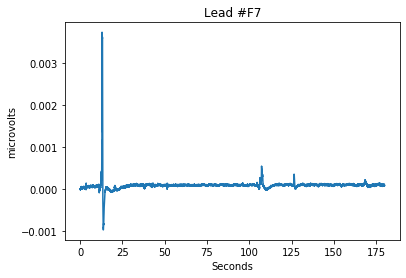

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, len(raw_data[channel, :]) / 256., len(raw_data[channel, :]))
y = raw_data[channel, :]

plt.plot(x, y)
plt.title('Lead #' + channels[channel]) 
plt.xlabel('Seconds'); plt.ylabel('microvolts')
plt.show()

Let's create a spectrogram for this lead.

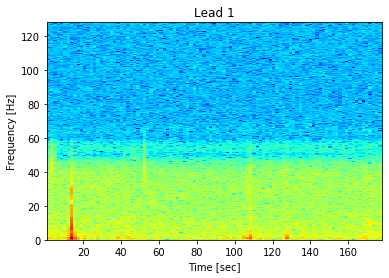

In [7]:
from scipy import signal

x = raw_data[channel, :]
fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Lead ' + str(channel)) # + LsEEG[channel]
plt.set_cmap('jet')
#plt.show()
fig, ax = plt.subplots( nrows=1, ncols=1 )
fig.figsize= (800, 800)
ax.pcolormesh(t, f, np.log10(Sxx))
fig.savefig('eeg_small.png')   # save the figure to file
plt.close(fig)


## Run this to generate images

In [8]:
import matplotlib.pyplot as plt # plotting
import mne
import numpy as np # linear algebra
import os
from scipy import signal
from sklearn.preprocessing import StandardScaler

# If folders don't exist already create them in the home directory.
if not os.path.exists("raw_images"):
    os.mkdir("raw_images")
if not os.path.exists("raw_images/relaxed"):
    os.mkdir("raw_images/relaxed")
if not os.path.exists("raw_images/concentration"):
    os.mkdir("raw_images/concentration")
if not os.path.exists("spectrogram_images"):
    os.mkdir("spectrogram_images")
if not os.path.exists("spectrogram_images/relaxed"):
    os.mkdir("spectrogram_images/relaxed")
if not os.path.exists("spectrogram_images/concentration"):
    os.mkdir("spectrogram_images/concentration")

for filename in os.listdir('eeg-dataset-of-fusion-relaxation-and-concentration-moods'):
    file_name = os.path.join('eeg-dataset-of-fusion-relaxation-and-concentration-moods',filename)
    
    file_type = 0 if filename.split(".")[0].endswith("E01") or filename.split(".")[0].endswith("E03") else 1
    data = mne.io.read_raw_edf(file_name)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    for index, channel in enumerate(channels):
        print("Processing %s channel of file %s." % (channel, filename))
        new_filename = "%s_%s.png" % (filename.split(".")[0], channel)
        # path to store raw time domain images of the signals
        # choose folder based on file type
        new_file_path = os.path.join('raw_images/relaxed',new_filename) if file_type == 0 else os.path.join('raw_images/concentration',new_filename)
        x = np.linspace(0, len(raw_data[index, :]) / 256., len(raw_data[index, :]))
        y = raw_data[index, :]
        fig, ax = plt.subplots( nrows=1, ncols=1 )
        fig.figsize= (800, 800)
        ax.plot(x, y)
        #ax.title('Lead #' + channel) 
        #ax.xlabel('Seconds'); plt.ylabel('microvolts')
        fig.savefig(new_file_path)   # save the figure to file
        plt.close(fig)
        #plt.plot(x, y)
        #plt.show()
    
        # path to store frequency domain spectrogram images of the signals
        new_file_path = os.path.join('spectrogram_images/relaxed',new_filename) if file_type == 0 else os.path.join('spectrogram_images/concentration',new_filename)
        x = raw_data[index, :]
        fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
        f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
        fig, ax = plt.subplots( nrows=1, ncols=1 )
        fig.figsize= (800, 800)
        ax.pcolormesh(t, f, np.log10(Sxx))
        #ax.ylabel('Frequency [Hz]')
        #ax.xlabel('Time [sec]')
        #plt.title('Lead ' + channel) # + LsEEG[channel]
        #ax.set_cmap('jet')
        #plt.show()
        fig.savefig(new_file_path)   # save the figure to file
        plt.close(fig)
    
    '''
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('spectrogram_files',new_filename)
    os.mkdir(new_file_path)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)
    '''

Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S001E01.edf.
Processing F7 channel of file S001E01.edf.
Processing F3 channel of file S001E01.edf.
Processing FC5 channel of file S001E01.edf.
Processing T7 channel of file S001E01.edf.
Processing P7 channel of file S001E01.edf.
Processing O1 channel of file S001E01.edf.
Processing O2 channel of file S001E01.edf.
Processing P8 channel of file S001E01.edf.


C:\Users\omkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10


Processing T8 channel of file S001E01.edf.
Processing FC6 channel of file S001E01.edf.
Processing F4 channel of file S001E01.edf.
Processing F8 channel of file S001E01.edf.
Processing AF4 channel of file S001E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S001E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S001E02.edf.
Processing F7 channel of file S001E02.edf.
Processing F3 channel of file S001E02.edf.
Processing FC5 channel of file S001E02.edf.
Processing T7 channel of file S001E02.edf.
Processing P7 channel of file S001E02.edf.
Processing O1 channel of file S001E02.edf.
Processing O2 channel of file S001E02.edf.
Processing P8 channel of file S001E02.edf.
Processing T8 channel of file S001E02.edf.
Processing FC6 channel of file S001E02.edf.
Processing F4 channel of file S001E02.edf.
Processing F8 channel of file S001E0

Processing O1 channel of file S003E03.edf.
Processing O2 channel of file S003E03.edf.
Processing P8 channel of file S003E03.edf.
Processing T8 channel of file S003E03.edf.
Processing FC6 channel of file S003E03.edf.
Processing F4 channel of file S003E03.edf.
Processing F8 channel of file S003E03.edf.
Processing AF4 channel of file S003E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S003E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S003E04.edf.
Processing F7 channel of file S003E04.edf.
Processing F3 channel of file S003E04.edf.
Processing FC5 channel of file S003E04.edf.
Processing T7 channel of file S003E04.edf.
Processing P7 channel of file S003E04.edf.
Processing O1 channel of file S003E04.edf.
Processing O2 channel of file S003E04.edf.
Processing P8 channel of file S003E04.edf.
Processing T8 channel of file S003E04

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S004E03.edf.
Processing F3 channel of file S004E03.edf.
Processing FC5 channel of file S004E03.edf.
Processing T7 channel of file S004E03.edf.
Processing P7 channel of file S004E03.edf.
Processing O1 channel of file S004E03.edf.
Processing O2 channel of file S004E03.edf.
Processing P8 channel of file S004E03.edf.


<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\omkar\Anaconda3\lib\site-packages\numpy\ma\core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S004E03.edf.
Processing FC6 channel of file S004E03.edf.
Processing F4 channel of file S004E03.edf.
Processing F8 channel of file S004E03.edf.
Processing AF4 channel of file S004E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S004E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S004E04.edf.
Processing F7 channel of file S004E04.edf.
Processing F3 channel of file S004E04.edf.
Processing FC5 channel of file S004E04.edf.
Processing T7 channel of file S004E04.edf.
Processing P7 channel of file S004E04.edf.
Processing O1 channel of file S004E04.edf.
Processing O2 channel of file S004E04.edf.
Processing P8 channel of file S004E04.edf.
Processing T8 channel of file S004E04.edf.
Processing FC6 channel of file S004E04.edf.
Processing F4 channel of file S004E04.edf.
Processing F8 channel of file S004E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S005E01.edf.
Processing F3 channel of file S005E01.edf.
Processing FC5 channel of file S005E01.edf.
Processing T7 channel of file S005E01.edf.
Processing P7 channel of file S005E01.edf.
Processing O1 channel of file S005E01.edf.
Processing O2 channel of file S005E01.edf.
Processing P8 channel of file S005E01.edf.
Processing T8 channel of file S005E01.edf.
Processing FC6 channel of file S005E01.edf.
Processing F4 channel of file S005E01.edf.
Processing F8 channel of file S005E01.edf.
Processing AF4 channel of file S005E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S005E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S005E02.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S005E02.edf.
Processing F3 channel of file S005E02.edf.
Processing FC5 channel of file S005E02.edf.
Processing T7 channel of file S005E02.edf.
Processing P7 channel of file S005E02.edf.
Processing O1 channel of file S005E02.edf.
Processing O2 channel of file S005E02.edf.
Processing P8 channel of file S005E02.edf.
Processing T8 channel of file S005E02.edf.
Processing FC6 channel of file S005E02.edf.
Processing F4 channel of file S005E02.edf.
Processing F8 channel of file S005E02.edf.
Processing AF4 channel of file S005E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S005E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S005E03.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S005E03.edf.
Processing F3 channel of file S005E03.edf.
Processing FC5 channel of file S005E03.edf.
Processing T7 channel of file S005E03.edf.
Processing P7 channel of file S005E03.edf.
Processing O1 channel of file S005E03.edf.
Processing O2 channel of file S005E03.edf.
Processing P8 channel of file S005E03.edf.
Processing T8 channel of file S005E03.edf.
Processing FC6 channel of file S005E03.edf.
Processing F4 channel of file S005E03.edf.
Processing F8 channel of file S005E03.edf.
Processing AF4 channel of file S005E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S005E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S005E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S005E04.edf.
Processing F3 channel of file S005E04.edf.
Processing FC5 channel of file S005E04.edf.
Processing T7 channel of file S005E04.edf.
Processing P7 channel of file S005E04.edf.
Processing O1 channel of file S005E04.edf.
Processing O2 channel of file S005E04.edf.
Processing P8 channel of file S005E04.edf.
Processing T8 channel of file S005E04.edf.
Processing FC6 channel of file S005E04.edf.
Processing F4 channel of file S005E04.edf.
Processing F8 channel of file S005E04.edf.
Processing AF4 channel of file S005E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S006E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S006E01.edf.
Processing F7 channel of file S006E01.edf.
Processing F3 channel of file S006E01.edf.
Processing FC5 channel of file S006E01.edf.
Processing T7 channel of file S006E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S006E02.edf.
Processing F3 channel of file S006E02.edf.
Processing FC5 channel of file S006E02.edf.
Processing T7 channel of file S006E02.edf.
Processing P7 channel of file S006E02.edf.
Processing O1 channel of file S006E02.edf.
Processing O2 channel of file S006E02.edf.
Processing P8 channel of file S006E02.edf.
Processing T8 channel of file S006E02.edf.
Processing FC6 channel of file S006E02.edf.
Processing F4 channel of file S006E02.edf.
Processing F8 channel of file S006E02.edf.
Processing AF4 channel of file S006E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S006E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S006E03.edf.
Processing F7 channel of file S006E03.edf.
Processing F3 channel of file S006E03.edf.
Processing FC5 channel of file S006E03.edf.
Processing T7 channel of file S006E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S006E04.edf.
Processing F3 channel of file S006E04.edf.
Processing FC5 channel of file S006E04.edf.
Processing T7 channel of file S006E04.edf.
Processing P7 channel of file S006E04.edf.
Processing O1 channel of file S006E04.edf.
Processing O2 channel of file S006E04.edf.
Processing P8 channel of file S006E04.edf.
Processing T8 channel of file S006E04.edf.
Processing FC6 channel of file S006E04.edf.
Processing F4 channel of file S006E04.edf.
Processing F8 channel of file S006E04.edf.
Processing AF4 channel of file S006E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S007E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S007E01.edf.
Processing F7 channel of file S007E01.edf.
Processing F3 channel of file S007E01.edf.
Processing FC5 channel of file S007E01.edf.
Processing T7 channel of file S007E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S009E01.edf.
Processing F3 channel of file S009E01.edf.
Processing FC5 channel of file S009E01.edf.
Processing T7 channel of file S009E01.edf.
Processing P7 channel of file S009E01.edf.
Processing O1 channel of file S009E01.edf.
Processing O2 channel of file S009E01.edf.
Processing P8 channel of file S009E01.edf.
Processing T8 channel of file S009E01.edf.
Processing FC6 channel of file S009E01.edf.
Processing F4 channel of file S009E01.edf.
Processing F8 channel of file S009E01.edf.
Processing AF4 channel of file S009E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S009E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S009E02.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S009E02.edf.
Processing F3 channel of file S009E02.edf.
Processing FC5 channel of file S009E02.edf.
Processing T7 channel of file S009E02.edf.
Processing P7 channel of file S009E02.edf.
Processing O1 channel of file S009E02.edf.
Processing O2 channel of file S009E02.edf.
Processing P8 channel of file S009E02.edf.
Processing T8 channel of file S009E02.edf.
Processing FC6 channel of file S009E02.edf.
Processing F4 channel of file S009E02.edf.
Processing F8 channel of file S009E02.edf.
Processing AF4 channel of file S009E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S009E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S009E03.edf.
Processing F7 channel of file S009E03.edf.
Processing F3 channel of file S009E03.edf.
Processing FC5 channel of file S009E03.edf.
Processing T7 channel of file S009E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S009E04.edf.
Processing F3 channel of file S009E04.edf.
Processing FC5 channel of file S009E04.edf.
Processing T7 channel of file S009E04.edf.
Processing P7 channel of file S009E04.edf.
Processing O1 channel of file S009E04.edf.
Processing O2 channel of file S009E04.edf.
Processing P8 channel of file S009E04.edf.
Processing T8 channel of file S009E04.edf.
Processing FC6 channel of file S009E04.edf.
Processing F4 channel of file S009E04.edf.
Processing F8 channel of file S009E04.edf.
Processing AF4 channel of file S009E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S010E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S010E01.edf.
Processing F7 channel of file S010E01.edf.
Processing F3 channel of file S010E01.edf.
Processing FC5 channel of file S010E01.edf.
Processing T7 channel of file S010E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S010E03.edf.
Processing F3 channel of file S010E03.edf.
Processing FC5 channel of file S010E03.edf.
Processing T7 channel of file S010E03.edf.
Processing P7 channel of file S010E03.edf.
Processing O1 channel of file S010E03.edf.
Processing O2 channel of file S010E03.edf.
Processing P8 channel of file S010E03.edf.
Processing T8 channel of file S010E03.edf.
Processing FC6 channel of file S010E03.edf.
Processing F4 channel of file S010E03.edf.
Processing F8 channel of file S010E03.edf.
Processing AF4 channel of file S010E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S010E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S010E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S010E04.edf.
Processing F3 channel of file S010E04.edf.
Processing FC5 channel of file S010E04.edf.
Processing T7 channel of file S010E04.edf.
Processing P7 channel of file S010E04.edf.
Processing O1 channel of file S010E04.edf.
Processing O2 channel of file S010E04.edf.
Processing P8 channel of file S010E04.edf.
Processing T8 channel of file S010E04.edf.
Processing FC6 channel of file S010E04.edf.
Processing F4 channel of file S010E04.edf.
Processing F8 channel of file S010E04.edf.
Processing AF4 channel of file S010E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S011E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S011E01.edf.
Processing F7 channel of file S011E01.edf.
Processing F3 channel of file S011E01.edf.
Processing FC5 channel of file S011E01.edf.
Processing T7 channel of file S011E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S011E02.edf.
Processing F3 channel of file S011E02.edf.
Processing FC5 channel of file S011E02.edf.
Processing T7 channel of file S011E02.edf.
Processing P7 channel of file S011E02.edf.
Processing O1 channel of file S011E02.edf.
Processing O2 channel of file S011E02.edf.
Processing P8 channel of file S011E02.edf.
Processing T8 channel of file S011E02.edf.
Processing FC6 channel of file S011E02.edf.
Processing F4 channel of file S011E02.edf.
Processing F8 channel of file S011E02.edf.
Processing AF4 channel of file S011E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S011E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S011E03.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S011E03.edf.
Processing F3 channel of file S011E03.edf.
Processing FC5 channel of file S011E03.edf.
Processing T7 channel of file S011E03.edf.
Processing P7 channel of file S011E03.edf.
Processing O1 channel of file S011E03.edf.
Processing O2 channel of file S011E03.edf.
Processing P8 channel of file S011E03.edf.
Processing T8 channel of file S011E03.edf.
Processing FC6 channel of file S011E03.edf.
Processing F4 channel of file S011E03.edf.
Processing F8 channel of file S011E03.edf.
Processing AF4 channel of file S011E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S011E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S011E04.edf.
Processing F7 channel of file S011E04.edf.
Processing F3 channel of file S011E04.edf.
Processing FC5 channel of file S011E04.edf.
Processing T7 channel of file S011E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S012E03.edf.
Processing F3 channel of file S012E03.edf.
Processing FC5 channel of file S012E03.edf.
Processing T7 channel of file S012E03.edf.
Processing P7 channel of file S012E03.edf.
Processing O1 channel of file S012E03.edf.
Processing O2 channel of file S012E03.edf.
Processing P8 channel of file S012E03.edf.
Processing T8 channel of file S012E03.edf.
Processing FC6 channel of file S012E03.edf.
Processing F4 channel of file S012E03.edf.
Processing F8 channel of file S012E03.edf.
Processing AF4 channel of file S012E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S012E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S012E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S012E04.edf.
Processing F3 channel of file S012E04.edf.
Processing FC5 channel of file S012E04.edf.
Processing T7 channel of file S012E04.edf.
Processing P7 channel of file S012E04.edf.
Processing O1 channel of file S012E04.edf.
Processing O2 channel of file S012E04.edf.
Processing P8 channel of file S012E04.edf.
Processing T8 channel of file S012E04.edf.
Processing FC6 channel of file S012E04.edf.
Processing F4 channel of file S012E04.edf.
Processing F8 channel of file S012E04.edf.
Processing AF4 channel of file S012E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S013E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S013E01.edf.
Processing F7 channel of file S013E01.edf.
Processing F3 channel of file S013E01.edf.
Processing FC5 channel of file S013E01.edf.
Processing T7 channel of file S013E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S014E03.edf.
Processing F3 channel of file S014E03.edf.
Processing FC5 channel of file S014E03.edf.
Processing T7 channel of file S014E03.edf.
Processing P7 channel of file S014E03.edf.
Processing O1 channel of file S014E03.edf.
Processing O2 channel of file S014E03.edf.
Processing P8 channel of file S014E03.edf.
Processing T8 channel of file S014E03.edf.
Processing FC6 channel of file S014E03.edf.
Processing F4 channel of file S014E03.edf.
Processing F8 channel of file S014E03.edf.
Processing AF4 channel of file S014E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S014E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S014E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S014E04.edf.
Processing F3 channel of file S014E04.edf.
Processing FC5 channel of file S014E04.edf.
Processing T7 channel of file S014E04.edf.
Processing P7 channel of file S014E04.edf.
Processing O1 channel of file S014E04.edf.
Processing O2 channel of file S014E04.edf.
Processing P8 channel of file S014E04.edf.
Processing T8 channel of file S014E04.edf.
Processing FC6 channel of file S014E04.edf.
Processing F4 channel of file S014E04.edf.
Processing F8 channel of file S014E04.edf.
Processing AF4 channel of file S014E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S015E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S015E01.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S015E01.edf.
Processing F3 channel of file S015E01.edf.
Processing FC5 channel of file S015E01.edf.
Processing T7 channel of file S015E01.edf.
Processing P7 channel of file S015E01.edf.
Processing O1 channel of file S015E01.edf.
Processing O2 channel of file S015E01.edf.
Processing P8 channel of file S015E01.edf.
Processing T8 channel of file S015E01.edf.
Processing FC6 channel of file S015E01.edf.
Processing F4 channel of file S015E01.edf.
Processing F8 channel of file S015E01.edf.
Processing AF4 channel of file S015E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S015E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S015E02.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S015E02.edf.
Processing F3 channel of file S015E02.edf.
Processing FC5 channel of file S015E02.edf.
Processing T7 channel of file S015E02.edf.
Processing P7 channel of file S015E02.edf.
Processing O1 channel of file S015E02.edf.
Processing O2 channel of file S015E02.edf.
Processing P8 channel of file S015E02.edf.
Processing T8 channel of file S015E02.edf.
Processing FC6 channel of file S015E02.edf.
Processing F4 channel of file S015E02.edf.
Processing F8 channel of file S015E02.edf.
Processing AF4 channel of file S015E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S015E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S015E03.edf.
Processing F7 channel of file S015E03.edf.
Processing F3 channel of file S015E03.edf.
Processing FC5 channel of file S015E03.edf.
Processing T7 channel of file S015E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S016E04.edf.
Processing F3 channel of file S016E04.edf.
Processing FC5 channel of file S016E04.edf.
Processing T7 channel of file S016E04.edf.
Processing P7 channel of file S016E04.edf.
Processing O1 channel of file S016E04.edf.
Processing O2 channel of file S016E04.edf.
Processing P8 channel of file S016E04.edf.
Processing T8 channel of file S016E04.edf.
Processing FC6 channel of file S016E04.edf.
Processing F4 channel of file S016E04.edf.
Processing F8 channel of file S016E04.edf.
Processing AF4 channel of file S016E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S017E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S017E01.edf.
Processing F7 channel of file S017E01.edf.
Processing F3 channel of file S017E01.edf.
Processing FC5 channel of file S017E01.edf.
Processing T7 channel of file S017E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S017E02.edf.
Processing F3 channel of file S017E02.edf.
Processing FC5 channel of file S017E02.edf.
Processing T7 channel of file S017E02.edf.
Processing P7 channel of file S017E02.edf.
Processing O1 channel of file S017E02.edf.
Processing O2 channel of file S017E02.edf.
Processing P8 channel of file S017E02.edf.
Processing T8 channel of file S017E02.edf.
Processing FC6 channel of file S017E02.edf.
Processing F4 channel of file S017E02.edf.
Processing F8 channel of file S017E02.edf.
Processing AF4 channel of file S017E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S017E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S017E03.edf.
Processing F7 channel of file S017E03.edf.
Processing F3 channel of file S017E03.edf.
Processing FC5 channel of file S017E03.edf.
Processing T7 channel of file S017E0

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S019E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S019E04.edf.
Processing F3 channel of file S019E04.edf.
Processing FC5 channel of file S019E04.edf.
Processing T7 channel of file S019E04.edf.
Processing P7 channel of file S019E04.edf.
Processing O1 channel of file S019E04.edf.
Processing O2 channel of file S019E04.edf.
Processing P8 channel of file S019E04.edf.
Processing T8 channel of file S019E04.edf.
Processing FC6 channel of file S019E04.edf.
Processing F4 channel of file S019E04.edf.
Processing F8 channel of file S019E04.edf.
Processing AF4 channel of file S019E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S020E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S020E01.edf.
Processing F7 channel of file S020E01.edf.
Processing F3 channel of file S020E01.edf.
Processing FC5 channel of file S020E01.edf.
Processing T7 channel of file S020E0

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S022E02.edf.
Processing F7 channel of file S022E02.edf.
Processing F3 channel of file S022E02.edf.
Processing FC5 channel of file S022E02.edf.
Processing T7 channel of file S022E02.edf.
Processing P7 channel of file S022E02.edf.
Processing O1 channel of file S022E02.edf.
Processing O2 channel of file S022E02.edf.
Processing P8 channel of file S022E02.edf.
Processing T8 channel of file S022E02.edf.
Processing FC6 channel of file S022E02.edf.
Processing F4 channel of file S022E02.edf.
Processing F8 channel of file S022E02.edf.
Processing AF4 channel of file S022E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S022E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S022E03.edf.
Processing F7 channel of file S022E03.e

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S024E01.edf.
Processing F3 channel of file S024E01.edf.
Processing FC5 channel of file S024E01.edf.
Processing T7 channel of file S024E01.edf.
Processing P7 channel of file S024E01.edf.
Processing O1 channel of file S024E01.edf.
Processing O2 channel of file S024E01.edf.
Processing P8 channel of file S024E01.edf.
Processing T8 channel of file S024E01.edf.
Processing FC6 channel of file S024E01.edf.
Processing F4 channel of file S024E01.edf.
Processing F8 channel of file S024E01.edf.
Processing AF4 channel of file S024E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S024E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S024E02.edf.
Processing F7 channel of file S024E02.edf.
Processing F3 channel of file S024E02.edf.
Processing FC5 channel of file S024E02.edf.
Processing T7 channel of file S024E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S024E03.edf.
Processing F3 channel of file S024E03.edf.
Processing FC5 channel of file S024E03.edf.
Processing T7 channel of file S024E03.edf.
Processing P7 channel of file S024E03.edf.
Processing O1 channel of file S024E03.edf.
Processing O2 channel of file S024E03.edf.
Processing P8 channel of file S024E03.edf.
Processing T8 channel of file S024E03.edf.
Processing FC6 channel of file S024E03.edf.
Processing F4 channel of file S024E03.edf.
Processing F8 channel of file S024E03.edf.
Processing AF4 channel of file S024E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S024E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S024E04.edf.
Processing F7 channel of file S024E04.edf.
Processing F3 channel of file S024E04.edf.
Processing FC5 channel of file S024E04.edf.
Processing T7 channel of file S024E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S025E04.edf.
Processing F3 channel of file S025E04.edf.
Processing FC5 channel of file S025E04.edf.
Processing T7 channel of file S025E04.edf.
Processing P7 channel of file S025E04.edf.
Processing O1 channel of file S025E04.edf.
Processing O2 channel of file S025E04.edf.
Processing P8 channel of file S025E04.edf.
Processing T8 channel of file S025E04.edf.
Processing FC6 channel of file S025E04.edf.
Processing F4 channel of file S025E04.edf.
Processing F8 channel of file S025E04.edf.
Processing AF4 channel of file S025E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S026E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S026E01.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S026E01.edf.
Processing F3 channel of file S026E01.edf.
Processing FC5 channel of file S026E01.edf.
Processing T7 channel of file S026E01.edf.
Processing P7 channel of file S026E01.edf.
Processing O1 channel of file S026E01.edf.
Processing O2 channel of file S026E01.edf.
Processing P8 channel of file S026E01.edf.
Processing T8 channel of file S026E01.edf.
Processing FC6 channel of file S026E01.edf.
Processing F4 channel of file S026E01.edf.
Processing F8 channel of file S026E01.edf.
Processing AF4 channel of file S026E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S026E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S026E02.edf.
Processing F7 channel of file S026E02.edf.
Processing F3 channel of file S026E02.edf.
Processing FC5 channel of file S026E02.edf.
Processing T7 channel of file S026E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S026E03.edf.
Processing F3 channel of file S026E03.edf.
Processing FC5 channel of file S026E03.edf.
Processing T7 channel of file S026E03.edf.
Processing P7 channel of file S026E03.edf.
Processing O1 channel of file S026E03.edf.
Processing O2 channel of file S026E03.edf.
Processing P8 channel of file S026E03.edf.
Processing T8 channel of file S026E03.edf.
Processing FC6 channel of file S026E03.edf.
Processing F4 channel of file S026E03.edf.
Processing F8 channel of file S026E03.edf.
Processing AF4 channel of file S026E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S026E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S026E04.edf.
Processing F7 channel of file S026E04.edf.
Processing F3 channel of file S026E04.edf.
Processing FC5 channel of file S026E04.edf.
Processing T7 channel of file S026E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S027E04.edf.
Processing F3 channel of file S027E04.edf.
Processing FC5 channel of file S027E04.edf.
Processing T7 channel of file S027E04.edf.
Processing P7 channel of file S027E04.edf.
Processing O1 channel of file S027E04.edf.
Processing O2 channel of file S027E04.edf.
Processing P8 channel of file S027E04.edf.
Processing T8 channel of file S027E04.edf.
Processing FC6 channel of file S027E04.edf.
Processing F4 channel of file S027E04.edf.
Processing F8 channel of file S027E04.edf.
Processing AF4 channel of file S027E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S028E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S028E01.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S028E01.edf.
Processing F3 channel of file S028E01.edf.
Processing FC5 channel of file S028E01.edf.
Processing T7 channel of file S028E01.edf.
Processing P7 channel of file S028E01.edf.
Processing O1 channel of file S028E01.edf.
Processing O2 channel of file S028E01.edf.
Processing P8 channel of file S028E01.edf.
Processing T8 channel of file S028E01.edf.
Processing FC6 channel of file S028E01.edf.
Processing F4 channel of file S028E01.edf.
Processing F8 channel of file S028E01.edf.
Processing AF4 channel of file S028E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S028E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S028E02.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S028E02.edf.
Processing F3 channel of file S028E02.edf.
Processing FC5 channel of file S028E02.edf.
Processing T7 channel of file S028E02.edf.
Processing P7 channel of file S028E02.edf.
Processing O1 channel of file S028E02.edf.
Processing O2 channel of file S028E02.edf.
Processing P8 channel of file S028E02.edf.
Processing T8 channel of file S028E02.edf.
Processing FC6 channel of file S028E02.edf.
Processing F4 channel of file S028E02.edf.
Processing F8 channel of file S028E02.edf.
Processing AF4 channel of file S028E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S028E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S028E03.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S028E03.edf.
Processing F3 channel of file S028E03.edf.
Processing FC5 channel of file S028E03.edf.
Processing T7 channel of file S028E03.edf.
Processing P7 channel of file S028E03.edf.
Processing O1 channel of file S028E03.edf.
Processing O2 channel of file S028E03.edf.
Processing P8 channel of file S028E03.edf.
Processing T8 channel of file S028E03.edf.
Processing FC6 channel of file S028E03.edf.
Processing F4 channel of file S028E03.edf.
Processing F8 channel of file S028E03.edf.
Processing AF4 channel of file S028E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S028E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S028E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S028E04.edf.
Processing F3 channel of file S028E04.edf.
Processing FC5 channel of file S028E04.edf.
Processing T7 channel of file S028E04.edf.
Processing P7 channel of file S028E04.edf.
Processing O1 channel of file S028E04.edf.
Processing O2 channel of file S028E04.edf.
Processing P8 channel of file S028E04.edf.
Processing T8 channel of file S028E04.edf.
Processing FC6 channel of file S028E04.edf.
Processing F4 channel of file S028E04.edf.
Processing F8 channel of file S028E04.edf.
Processing AF4 channel of file S028E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S029E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S029E01.edf.
Processing F7 channel of file S029E01.edf.
Processing F3 channel of file S029E01.edf.
Processing FC5 channel of file S029E01.edf.
Processing T7 channel of file S029E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S029E02.edf.
Processing F3 channel of file S029E02.edf.
Processing FC5 channel of file S029E02.edf.
Processing T7 channel of file S029E02.edf.
Processing P7 channel of file S029E02.edf.
Processing O1 channel of file S029E02.edf.
Processing O2 channel of file S029E02.edf.
Processing P8 channel of file S029E02.edf.
Processing T8 channel of file S029E02.edf.
Processing FC6 channel of file S029E02.edf.
Processing F4 channel of file S029E02.edf.
Processing F8 channel of file S029E02.edf.
Processing AF4 channel of file S029E02.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S029E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S029E03.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S029E03.edf.
Processing F3 channel of file S029E03.edf.
Processing FC5 channel of file S029E03.edf.
Processing T7 channel of file S029E03.edf.
Processing P7 channel of file S029E03.edf.
Processing O1 channel of file S029E03.edf.
Processing O2 channel of file S029E03.edf.
Processing P8 channel of file S029E03.edf.
Processing T8 channel of file S029E03.edf.
Processing FC6 channel of file S029E03.edf.
Processing F4 channel of file S029E03.edf.
Processing F8 channel of file S029E03.edf.
Processing AF4 channel of file S029E03.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S029E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S029E04.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S029E04.edf.
Processing F3 channel of file S029E04.edf.
Processing FC5 channel of file S029E04.edf.
Processing T7 channel of file S029E04.edf.
Processing P7 channel of file S029E04.edf.
Processing O1 channel of file S029E04.edf.
Processing O2 channel of file S029E04.edf.
Processing P8 channel of file S029E04.edf.
Processing T8 channel of file S029E04.edf.
Processing FC6 channel of file S029E04.edf.
Processing F4 channel of file S029E04.edf.
Processing F8 channel of file S029E04.edf.
Processing AF4 channel of file S029E04.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S030E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S030E01.edf.


<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S030E01.edf.
Processing F3 channel of file S030E01.edf.
Processing FC5 channel of file S030E01.edf.
Processing T7 channel of file S030E01.edf.
Processing P7 channel of file S030E01.edf.
Processing O1 channel of file S030E01.edf.
Processing O2 channel of file S030E01.edf.
Processing P8 channel of file S030E01.edf.
Processing T8 channel of file S030E01.edf.
Processing FC6 channel of file S030E01.edf.
Processing F4 channel of file S030E01.edf.
Processing F8 channel of file S030E01.edf.
Processing AF4 channel of file S030E01.edf.
Extracting EDF parameters from C:\Users\omkar\Projects\CSE240-AI\Project\eeg-dataset-of-fusion-relaxation-and-concentration-moods\S030E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S030E02.edf.
Processing F7 channel of file S030E02.edf.
Processing F3 channel of file S030E02.edf.
Processing FC5 channel of file S030E02.edf.
Processing T7 channel of file S030E0

<ipython-input-8-d4bb1c280c2d>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F7 channel of file S030E04.edf.
Processing F3 channel of file S030E04.edf.
Processing FC5 channel of file S030E04.edf.
Processing T7 channel of file S030E04.edf.
Processing P7 channel of file S030E04.edf.
Processing O1 channel of file S030E04.edf.
Processing O2 channel of file S030E04.edf.
Processing P8 channel of file S030E04.edf.
Processing T8 channel of file S030E04.edf.
Processing FC6 channel of file S030E04.edf.
Processing F4 channel of file S030E04.edf.
Processing F8 channel of file S030E04.edf.
Processing AF4 channel of file S030E04.edf.
